In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import sweetviz as sv

In [2]:
ath = pd.read_csv("athlete_events.csv")
reg = pd.read_csv("noc_regions.csv")

In [3]:
ath.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
ath.shape

(271116, 15)

In [5]:
reg.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [6]:
reg.shape

(230, 3)

In [7]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
ath["Name"] = ath["Name"].astype('string')

In [9]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  string 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(9), string(1)
memory usage: 31.0+ MB


In [10]:
ath.describe(include = 'float64')

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [11]:
ath.describe(include = 'object')

,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,2,1184,230,51,2,42,66,765,3
top,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [12]:
# First merge the datasets

In [13]:
data=ath.merge(reg,on="NOC",how='left')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  string 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(11), string(1)
memory usage: 37.2+ MB


In [15]:
data.head(12)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [16]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [17]:
data.duplicated().sum()

1385

In [18]:
data.drop_duplicates(inplace= True)

In [19]:
data.duplicated().sum()

0

In [20]:
data["region"].nunique()

205

In [21]:
data["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway',
       'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt',
       'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan',
       'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon',
       'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Virgin Islands, US', 'Sri Lanka',
       'Armenia', 'Ivory

<AxesSubplot:xlabel='Age', ylabel='Count'>

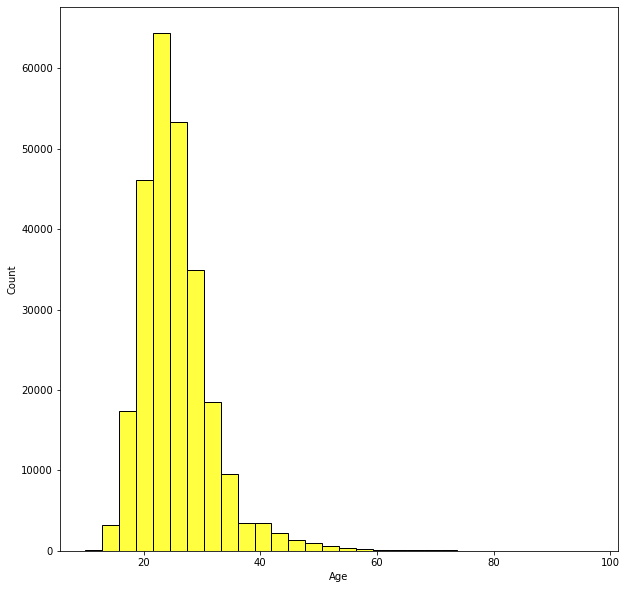

In [106]:
plt.figure(figsize = [10,10])
sns.histplot(data['Age'],bins=30,color='yellow')

# GENDER DISTRIBUTION

In [22]:
gender_counts_sum = data[data["Season"]=="Summer"].Sex.value_counts()
print("Gender Distribution in Summer Season:")
print(gender_counts_sum)
print("\n")
gender_counts_win = data[data["Season"]=="Winter"].Sex.value_counts()
print("Gender Distribution in Winter Season:")
print(gender_counts_win)

Gender Distribution in Summer Season:
M    161868
F     59299
Name: Sex, dtype: int64


Gender Distribution in Winter Season:
M    33485
F    15079
Name: Sex, dtype: int64


<AxesSubplot:title={'center':'Gender Distribution in Summer Season:'}, ylabel='Sex'>

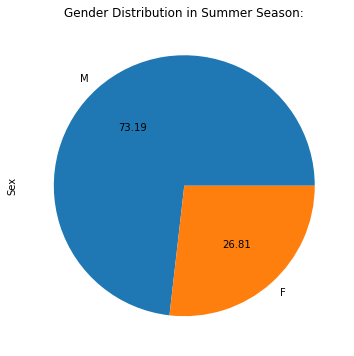

In [23]:
plt.figure(figsize=(15,6))
plt.title('Gender Distribution in Summer Season:')
gender_counts_sum.plot(kind="pie", autopct='%.2f')

<AxesSubplot:title={'center':'Gender Distribution in Winter Season:'}, ylabel='Sex'>

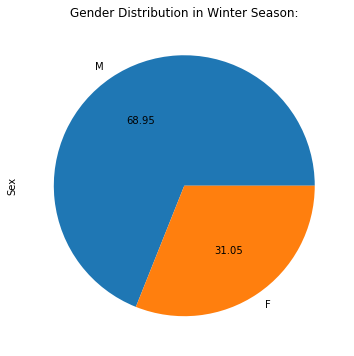

In [24]:
plt.figure(figsize=(15,6))
plt.title('Gender Distribution in Winter Season:')
gender_counts_win.plot(kind="pie", autopct='%.2f')

In [25]:
gender_counts = data.Sex.value_counts()
print("Gender Distribution:")
print(gender_counts)

Gender Distribution:
M    195353
F     74378
Name: Sex, dtype: int64


<AxesSubplot:title={'center':'Gender Distribution Overall'}, ylabel='Sex'>

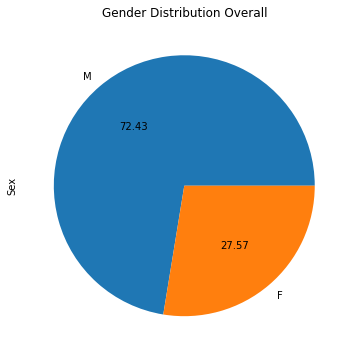

In [26]:
plt.figure(figsize=(15,6))
plt.title('Gender Distribution Overall')
gender_counts.plot(kind="pie", autopct='%.2f')

### Check Women participation Year Wise

In [27]:
female_sum = data[(data.Sex=='F') & (data.Season=='Summer')][['Sex','Year']]
female_sum = female_sum.groupby('Year').count().reset_index()
print("Female participants across summer seasons year wise")
female_sum.rename(columns={"Sex":"Women"},inplace=True)
female_sum.sort_values("Year",ascending=True)

Female participants across summer seasons year wise


,Year,Women
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,234
7,1928,391
8,1932,265
9,1936,447


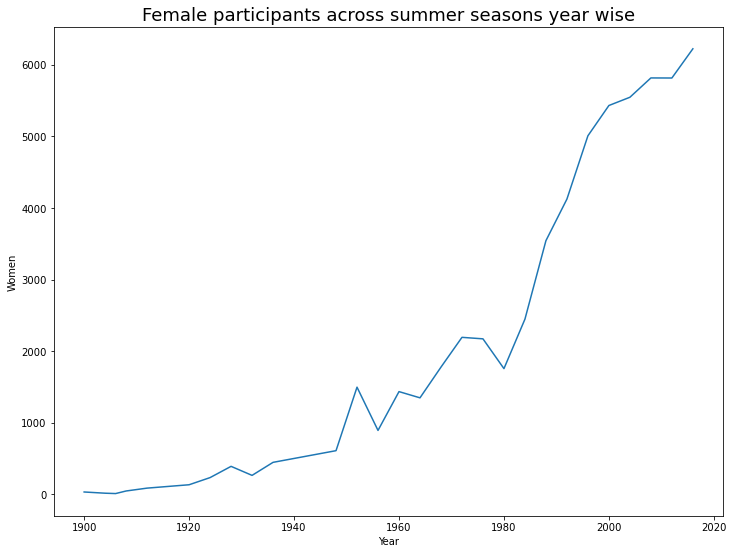

In [28]:
plt.figure(figsize=(12,9))
sns.lineplot(x=female_sum.Year,y=female_sum.Women)
plt.title("Female participants across summer seasons year wise",fontsize=18)
plt.show()

In [29]:
female_win = data[(data.Sex=='F') & (data.Season=='Winter')][['Sex','Year']]
female_win = female_win.groupby('Year').count().reset_index()
print("Female participants across winter seasons year wise")
female_win.rename(columns={"Sex":"Women"},inplace=True)
female_win.sort_values("Year",ascending=True)

Female participants across winter seasons year wise


,Year,Women
0,1924,17
1,1928,33
2,1932,22
3,1936,81
4,1948,133
5,1952,185
6,1956,246
7,1960,295
8,1964,404
9,1968,416


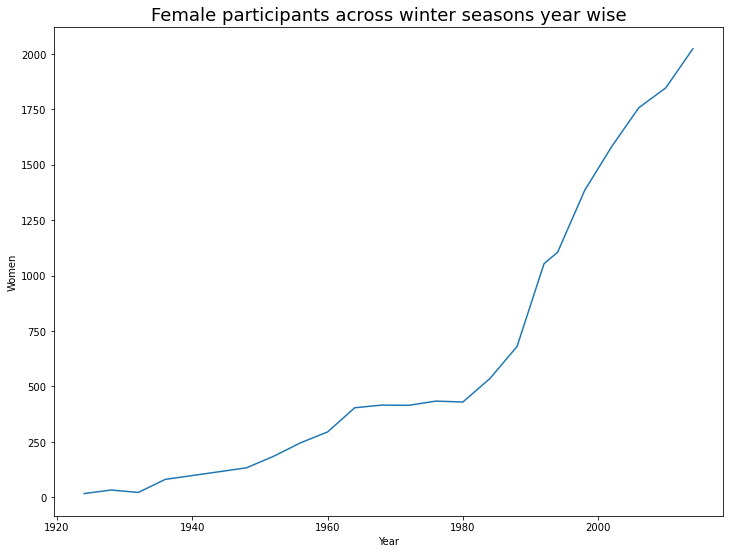

In [30]:
plt.figure(figsize=(12,9))
sns.lineplot(x=female_win.Year,y=female_win.Women)
plt.title("Female participants across winter seasons year wise",fontsize=18)
plt.show()

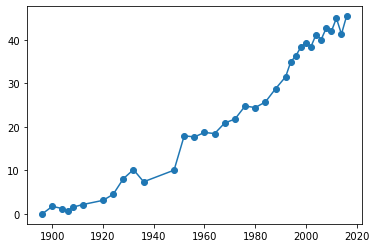

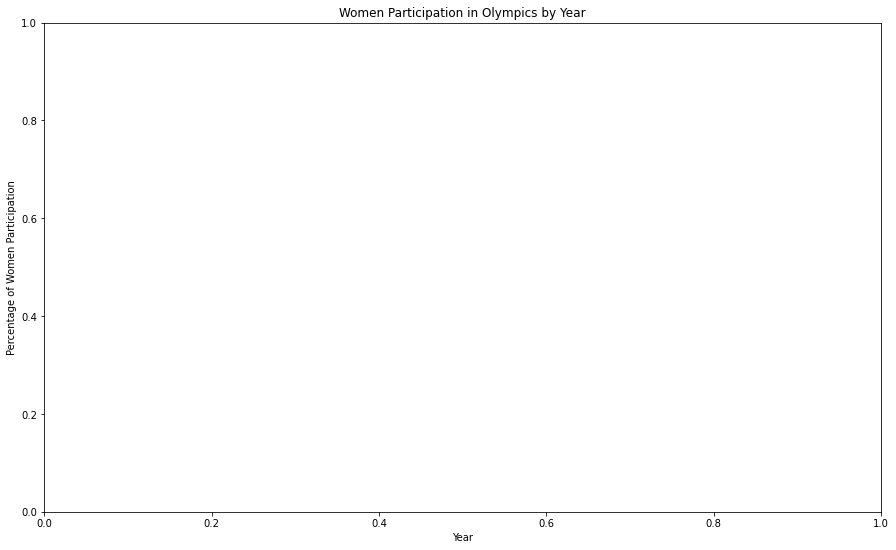

In [44]:
grouped_data = data.groupby('Year')

# Count total participants for each year
total_participants = grouped_data['Sex'].count()

# Filter the data for female participants and count them for each year
female_participants = grouped_data.apply(lambda x: x[x['Sex'] == 'F']['Sex'].count())

# Calculate the percentage of women's participation
female_percentage = (female_participants / total_participants) * 100

# Plot the percentage of women's participation year-wise
plt.plot(female_percentage.index, female_percentage.values, marker='o')

# Set labels and title
plt.figure(figsize=(15,9))
plt.xlabel('Year')
plt.ylabel('Percentage of Women Participation')
plt.title('Women Participation in Olympics by Year')

# Display the plot
plt.show()

### Check women participation by country percentage wise

In [45]:
# calculate the total number of athletes for each country
total_athletes = data.groupby('region')['Name'].nunique()

# calculate the number of female athletes for each country
female_athletes = data[data['Sex'] == 'F'].groupby('region')['Name'].nunique()

# calculate the percentage of female athletes for each country
female_percentage = (female_athletes / total_athletes) * 100

# reset the index
female_percentage = female_percentage.reset_index()
female_percentage.rename(columns={"Name":"Percentage"},inplace=True)
female_percentage=female_percentage.sort_values("Percentage",ascending=False)
female_percentage

,region,Percentage
183,Timor-Leste,62.500000
95,Kosovo,62.500000
22,Bhutan,61.904762
153,Saint Kitts,52.631579
138,Palau,52.380952
...,...,...
148,Qatar,3.571429
137,Pakistan,3.197674
84,Iraq,3.092784
159,Saudi Arabia,2.702703


In [46]:
female_percentage[female_percentage['region'] == "India"]

,region,Percentage
80,India,17.257143


In [47]:
female_percentage[female_percentage['region'] == "USA"]

,region,Percentage
191,USA,27.072109


In [48]:
female_percentage.head(20)

,region,Percentage
183,Timor-Leste,62.500000
95,Kosovo,62.500000
22,Bhutan,61.904762
153,Saint Kitts,52.631579
138,Palau,52.380952
39,China,51.083481
134,North Korea,50.510204
114,Marshall Islands,50.000000
74,Guinea-Bissau,50.000000
154,Saint Lucia,47.619048


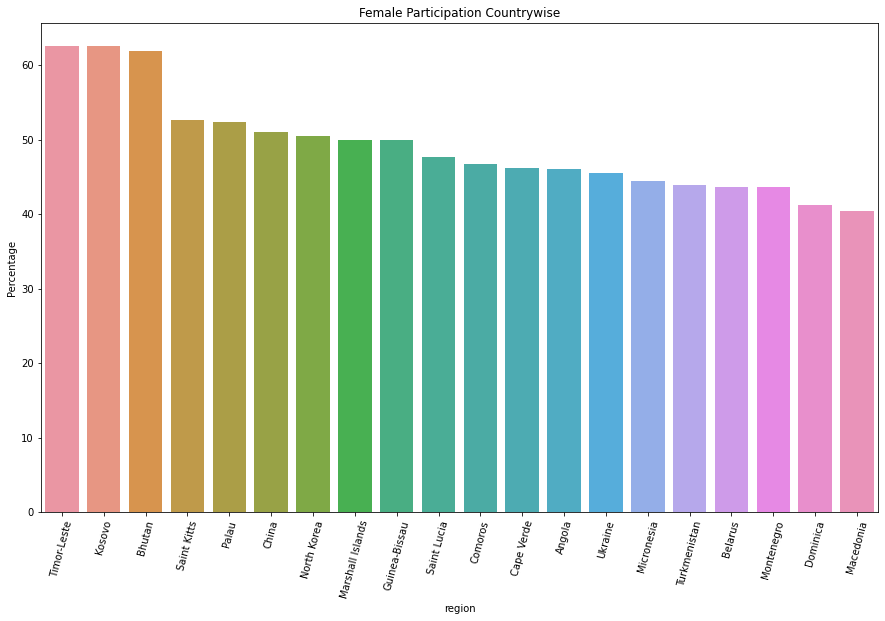

In [49]:
plt.figure(figsize=(15,9))
plt.xticks(rotation=75)
plt.title('Female Participation Countrywise')
plt.xlabel("Countries")
plt.ylabel("Participation Proportion:")
sns.barplot(x=female_percentage.region.head(20), y=female_percentage["Percentage"].head(20))
plt.show()

### Check proportion of indian female atheletes year wise

In [50]:
#let us check for summer olympics
india_data_sum = data[(data['region'] == 'India') & (data["Season"]=='Summer')]

# calculate the number of female indian athletes for each year
female_india_sum = india_data_sum[india_data_sum['Sex'] == 'F'].groupby('Year')['Name'].nunique()

# calculate the total number of indian athletes for each year
total_india_sum = india_data_sum.groupby('Year')['Name'].nunique()

# calculate the percentage of female indian athletes for each year
female_per_india_sum = (female_india_sum/ total_india_sum) * 100

female_per_india_sum=female_per_india_sum.reset_index()
female_per_india_sum.rename(columns={"Name":"Percentage"},inplace=True)
female_per_india_sum

,Year,Percentage
0,1900,NaN
1,1920,NaN
2,1924,7.692308
3,1928,NaN
4,1932,NaN
5,1936,NaN
6,1948,NaN
7,1952,6.250000
8,1956,1.694915
9,1960,NaN


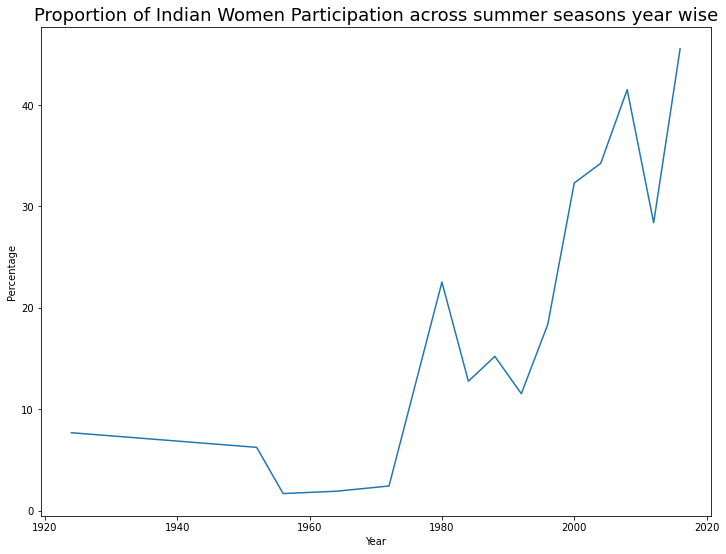

In [51]:
plt.figure(figsize=(12,9))
sns.lineplot(x=female_per_india_sum["Year"],y=female_per_india_sum["Percentage"])
plt.title("Proportion of Indian Women Participation across summer seasons year wise",fontsize=18)
plt.show()

In [57]:
#let us check for winter olympics
india_data_win = data[(data['region'] == 'India') & (data["Season"]=='Winter')]

# calculate the number of female indian athletes for each year
female_india_win = india_data_win[india_data_win['Sex'] == 'F'].groupby('Year')['Name'].nunique()

# calculate the total number of indian athletes for each year
total_india_win = india_data_win.groupby('Year')['Name'].nunique()

# calculate the percentage of female indian athletes for each year
female_per_india_win = (female_india_win/ total_india_win) * 100

female_per_india_win=female_per_india_win.reset_index()
female_per_india_win.rename(columns={"Name":"Percentage"},inplace=True)
female_per_india_win

,Year,Percentage
0,1924,NaN
1,1964,NaN
2,1968,NaN
3,1988,33.333333
4,1992,NaN
5,1998,NaN
6,2002,NaN
7,2006,25.000000
8,2010,NaN
9,2014,NaN


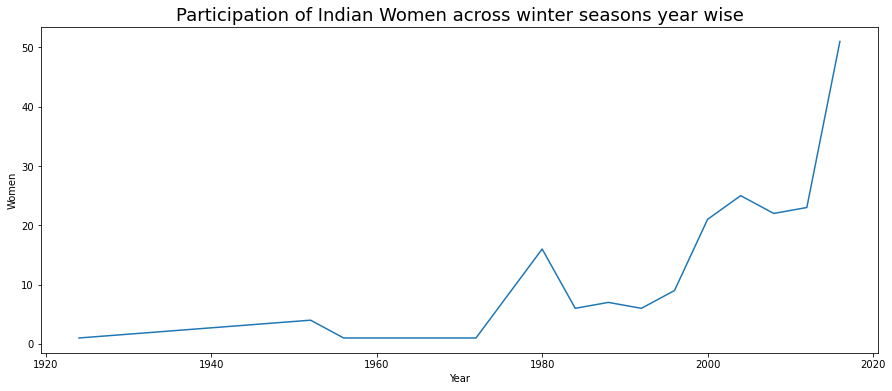

In [58]:
plt.figure(figsize=(15,6))
sns.lineplot(x=female_india_sum["Year"],y=female_india_sum["Women"])
plt.title("Participation of Indian Women across winter seasons year wise",fontsize=18)
plt.show()

In [41]:
#Countrywise participation in olympics

In [103]:
topc=data.region.value_counts().sort_values(ascending=False).head(10)
topc

USA          18604
Germany      15787
France       12551
UK           12115
Russia       11692
Italy        10668
Canada        9681
Japan         8424
Sweden        8291
Australia     7723
Name: region, dtype: int64

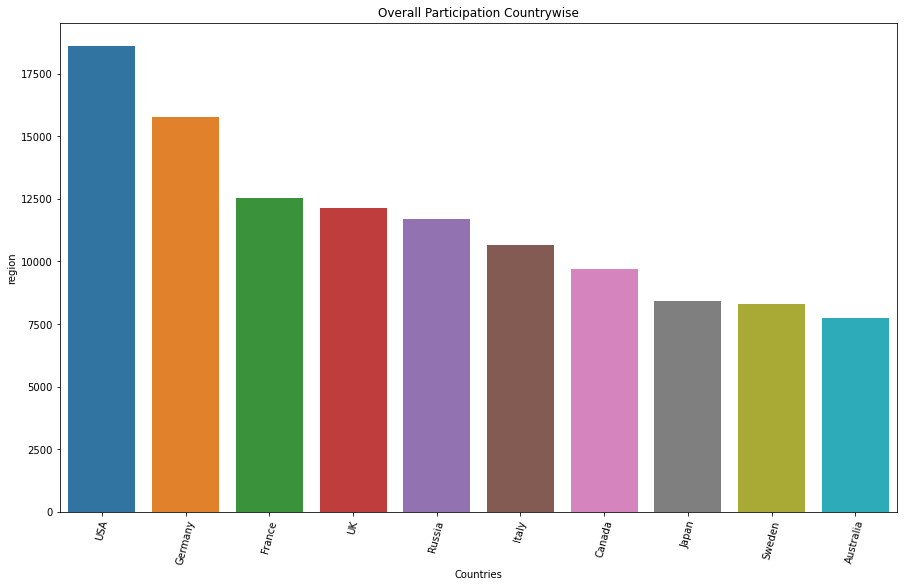

In [104]:
plt.figure(figsize=(15,9))
plt.xticks(rotation=75)
plt.title('Overall Participation Countrywise')
plt.xlabel("Countries")
plt.ylabel("Counts:")
sns.barplot(x=topc.head(20).index, y=topc.head(20))
plt.show()

# PARTICIPANTS ACROSS SUMMER VS WINTER

In [59]:
# Split the dataset into Summer and Winter seasons
summer = data[data['Season'] == 'Summer']
winter = data[data['Season'] == 'Winter']

# Calculate the total participants for each season
summer_total_participants = summer.groupby('Year')['Name'].nunique()
winter_total_participants = winter.groupby('Year')['Name'].nunique()

# Compare the total participants between Summer and Winter seasons
summer_mean_participants = summer_total_participants.mean()
winter_mean_participants = winter_total_participants.mean()

# Print the results
print("Mean total participants in Summer season:", summer_mean_participants)
print("Mean total participants in Winter season:", winter_mean_participants)

Mean total participants in Summer season: 5472.793103448276
Mean total participants in Winter season: 1299.3636363636363


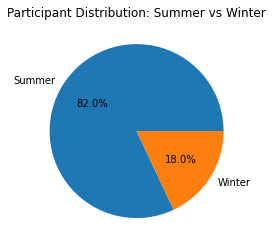

In [60]:
# Group the data by the season and calculate the count of participants
parti_season = data.groupby('Season')['Name'].count()

# Plot a pie chart to visualize the distribution of participants
fig, ax = plt.subplots()
ax.pie(parti_season, labels=parti_season.index, autopct='%1.1f%%')
ax.set_title('Participant Distribution: Summer vs Winter')
plt.show()

In [ ]:
parti_season

In [61]:
summer_events = summer['Event'].nunique()
winter_events= winter['Event'].nunique()

summer_sports = summer['Sport'].nunique()
winter_sports = winter['Sport'].nunique()

In [62]:
print('No of Sports Played in Winter:',winter_sports,".",'No of Events held in Winter:',winter_events)

No of Sports Played in Winter: 17 . No of Events held in Winter: 119


In [63]:
print('No of Sports Played in Summer:',summer_sports,".",'No of Events held in Summer:',summer_events)

No of Sports Played in Summer: 52 . No of Events held in Summer: 651


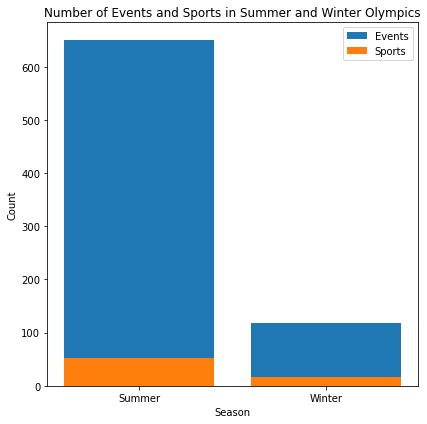

In [65]:
# Create a bar plot to visualize the counts
fig, ax = plt.subplots(figsize=(6,6))

seasons = ['Summer', 'Winter']
event_counts = [summer_events, winter_events]
sport_counts = [summer_sports, winter_sports]

ax.bar(seasons, event_counts, label='Events')
ax.bar(seasons, sport_counts, label='Sports')

ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Number of Events and Sports in Summer and Winter Olympics')
ax.legend()

plt.tight_layout()
plt.show()

# TOP SPORTS IN SUMMER AND WINTER

In [66]:
top_s_sum= summer.Sport.value_counts()
top_s_sum.reset_index()

,index,Sport
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10827
5,Fencing,10735
6,Rowing,10595
7,Wrestling,7154
8,Football,6745
9,Sailing,6549


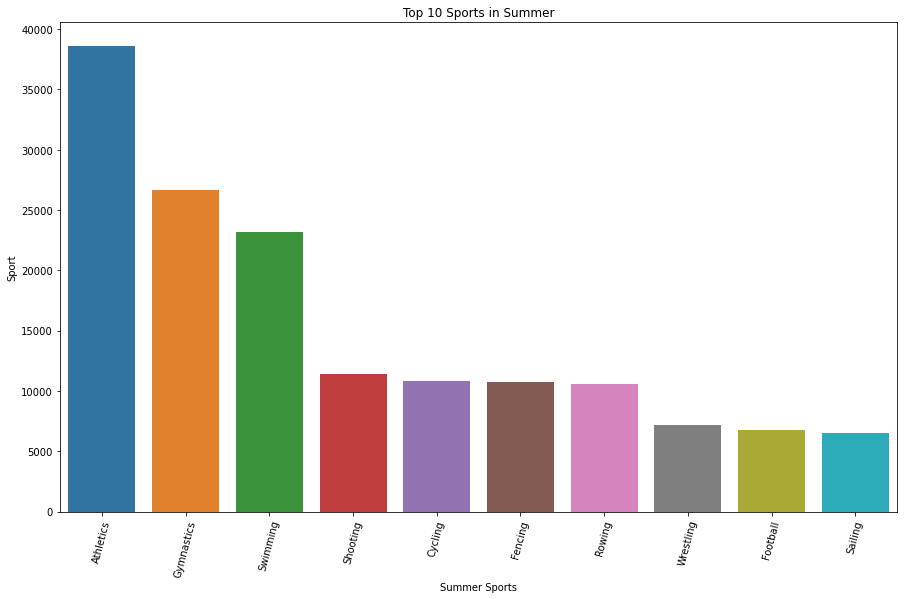

In [67]:
plt.figure(figsize=(15,9))
plt.xticks(rotation=75)
plt.title('Top 10 Sports in Summer')
plt.xlabel("Summer Sports")
plt.ylabel("Counts:")
sns.barplot(x=top_s_sum.head(10).index, y=top_s_sum.head(10))
plt.show()

In [68]:
top_s_win= winter.Sport.value_counts()
top_s_win.reset_index()

,index,Sport
0,Cross Country Skiing,9133
1,Alpine Skiing,8829
2,Speed Skating,5613
3,Ice Hockey,5456
4,Biathlon,4893
5,Bobsleigh,3058
6,Ski Jumping,2401
7,Figure Skating,2244
8,Short Track Speed Skating,1534
9,Luge,1479


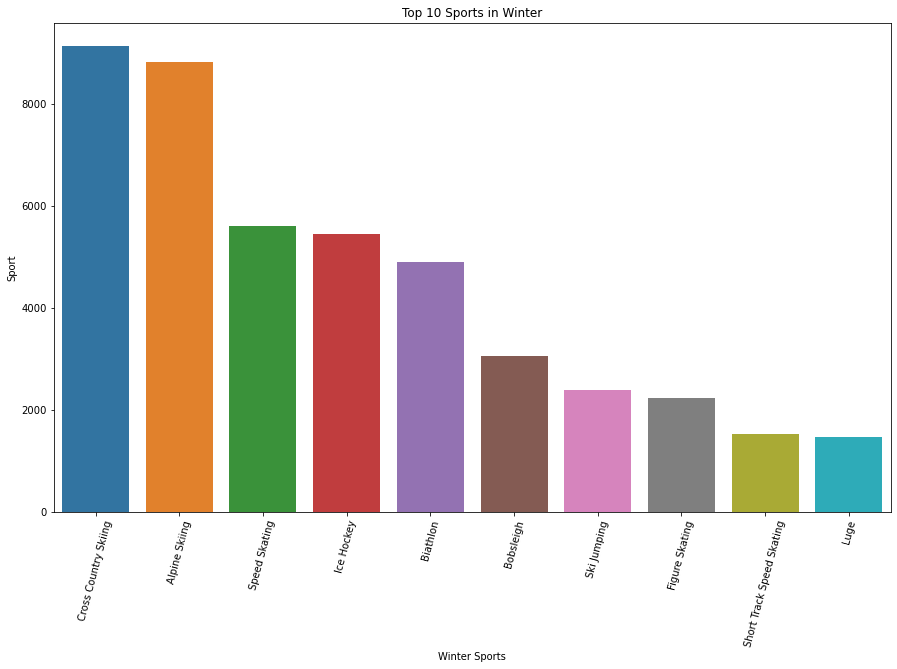

In [69]:
plt.figure(figsize=(15,9))
plt.xticks(rotation=75)
plt.title('Top 10 Sports in Winter')
plt.xlabel("Winter Sports")
plt.ylabel("Counts:")
sns.barplot(x=top_s_win.head(10).index, y=top_s_win.head(10))
plt.show()

# AGE DISTRIBUTION

In [ ]:
data["Age"].describe()

In [ ]:
plt.figure(figsize = [10,10])
sns.histplot(data['Age'],bins=30,color='yellow')

#Check Age Distribution For Women

In [ ]:
data[data["Sex"]=="F"]["Age"].describe()

In [ ]:
plt.figure(figsize = [10,10])
sns.histplot(data[data["Sex"]=="F"]["Age"],bins=30,color='yellow')

# MEDALS WON COUNTRY WISE

In [70]:
data["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [71]:
data["Medal"].value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [72]:
# Create dummy variables for Medal column using one-hot encoding
medal_types = pd.get_dummies(data["Medal"])
data2 = pd.concat([data, medal_types], axis=1)
data2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN,0,0,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN,0,0,0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN,0,0,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN,0,0,0


In [73]:
x=data2.drop_duplicates(subset=['Team','NOC',"Games","Year","City","Season","Sport","Event","Medal"])
medals_country=x.groupby(["region","Season"]).sum()[["Gold","Silver","Bronze"]]
medals_country["Total Medals"]=medals_country.sum(axis=1)
medals_country = medals_country.sort_values(by="Total Medals", ascending=False).reset_index()
#medals_country.head(20)

In [74]:
medals_country

,region,Season,Gold,Silver,Bronze,Total Medals
0,USA,Summer,1035.0,802.0,708.0,2545.0
1,Russia,Summer,592.0,498.0,487.0,1577.0
2,Germany,Summer,444.0,457.0,491.0,1392.0
3,UK,Summer,278.0,317.0,300.0,895.0
4,France,Summer,234.0,256.0,287.0,777.0
...,...,...,...,...,...,...
311,Lebanon,Winter,0.0,0.0,0.0,0.0
312,Albania,Summer,0.0,0.0,0.0,0.0
313,Liberia,Summer,0.0,0.0,0.0,0.0
314,Libya,Summer,0.0,0.0,0.0,0.0


In [75]:
medals_country.columns

Index(['region', 'Season', 'Gold', 'Silver', 'Bronze', 'Total Medals'], dtype='object')

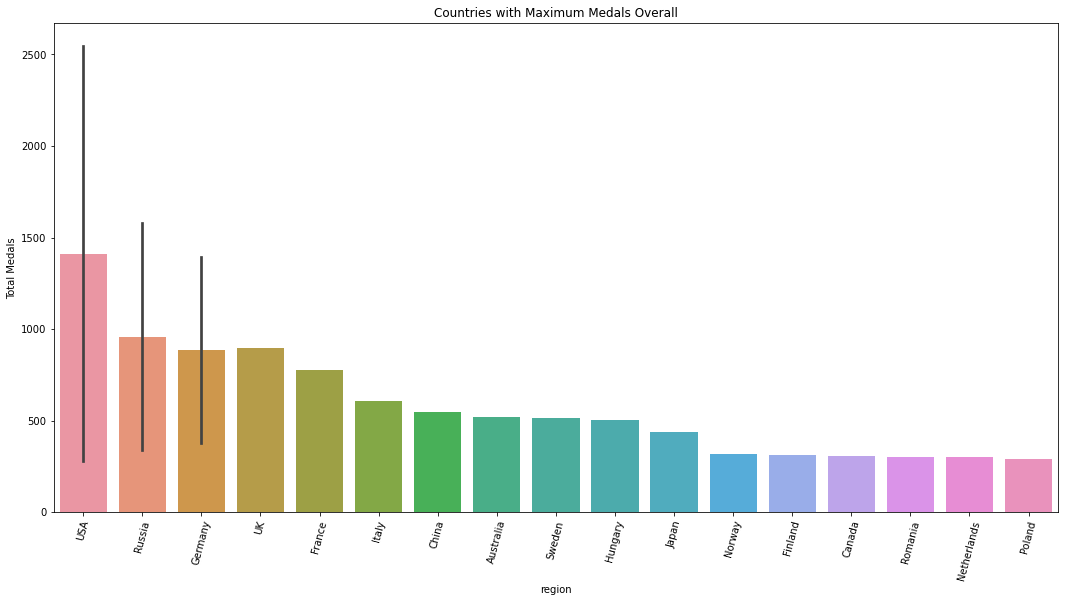

In [76]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
plt.title('Countries with Maximum Medals Overall')
sns.barplot(x=medals_country.head(20).region, y=medals_country.head(20)["Total Medals"])
plt.show()

In [77]:
x=data2.drop_duplicates(subset=['Team','NOC',"Games","Year","City","Season","Sport","Event","Medal"])
gold_country=x.groupby(["region","Season"]).sum()[["Gold","Silver","Bronze"]]
gold_country = gold_country.sort_values(by="Gold", ascending=False).reset_index()
gold_country

,region,Season,Gold,Silver,Bronze
0,USA,Summer,1035.0,802.0,708.0
1,Russia,Summer,592.0,498.0,487.0
2,Germany,Summer,444.0,457.0,491.0
3,UK,Summer,278.0,317.0,300.0
4,France,Summer,234.0,256.0,287.0
...,...,...,...,...,...
311,Kyrgyzstan,Winter,0.0,0.0,0.0
312,Laos,Summer,0.0,0.0,0.0
313,Latvia,Winter,0.0,4.0,3.0
314,Lebanon,Summer,0.0,2.0,2.0


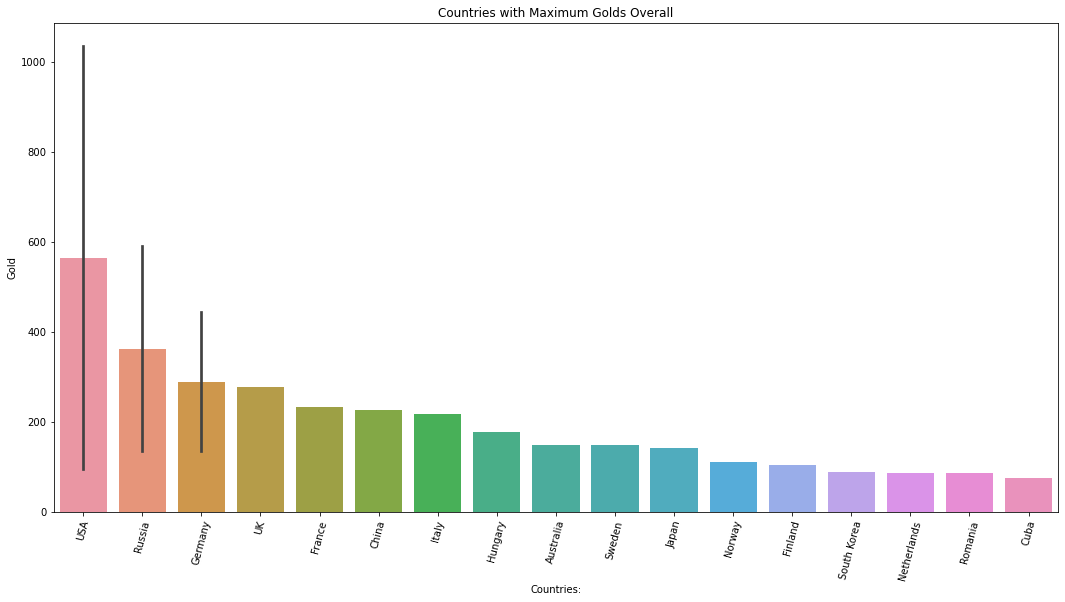

In [78]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
plt.title('Countries with Maximum Golds Overall')
sns.barplot(x=gold_country.head(20).region, y=gold_country.head(20)["Gold"])
plt.xlabel("Countries:")
plt.show()

In [79]:
# Sports that fetch maximum gold medals for US

In [80]:
US_gold = data[(data.Medal == 'Gold') & (data.region == 'USA')]
US_gold = US_gold.groupby('Sport')['Medal'].count().reset_index()
US_gold.rename(columns={"Medal":"Gold"},inplace=True)
US_gold=US_gold.sort_values("Gold",ascending=False)
US_gold.head(10)

,Sport,Gold
34,Swimming,649
3,Athletics,542
5,Basketball,281
25,Rowing,186
28,Shooting,117
15,Football,66
27,Sailing,60
18,Gymnastics,60
19,Ice Hockey,56
43,Wrestling,52


# Medals Won By India

In [81]:
medals_country[medals_country["region"]=="India"]

,region,Season,Gold,Silver,Bronze,Total Medals
68,India,Summer,9.0,7.0,12.0,28.0
167,India,Winter,1.0,0.0,0.0,1.0


In [82]:
medals_country[medals_country["region"]=="USA"]

,region,Season,Gold,Silver,Bronze,Total Medals
0,USA,Summer,1035.0,802.0,708.0,2545.0
19,USA,Winter,96.0,99.0,84.0,279.0


# Find the country that won highest no of total medals in summer and winter

In [83]:
sum_medals=medals_country[medals_country["Season"]=="Summer"]
sum_medals

,region,Season,Gold,Silver,Bronze,Total Medals
0,USA,Summer,1035.0,802.0,708.0,2545.0
1,Russia,Summer,592.0,498.0,487.0,1577.0
2,Germany,Summer,444.0,457.0,491.0,1392.0
3,UK,Summer,278.0,317.0,300.0,895.0
4,France,Summer,234.0,256.0,287.0,777.0
...,...,...,...,...,...,...
308,Kiribati,Summer,0.0,0.0,0.0,0.0
310,Laos,Summer,0.0,0.0,0.0,0.0
312,Albania,Summer,0.0,0.0,0.0,0.0
313,Liberia,Summer,0.0,0.0,0.0,0.0


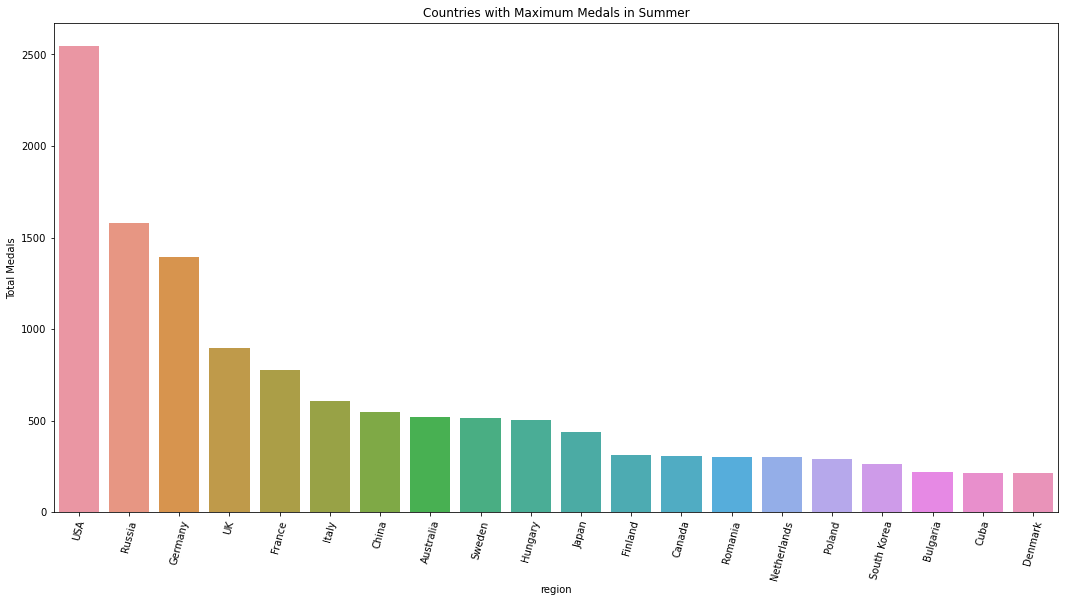

In [84]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
plt.title('Countries with Maximum Medals in Summer')
sns.barplot(x=sum_medals.head(20).region, y=sum_medals.head(20)["Total Medals"])
plt.show()

In [85]:
win_medals=medals_country[medals_country["Season"]=="Winter"]
win_medals

,region,Season,Gold,Silver,Bronze,Total Medals
11,Germany,Winter,136.0,135.0,106.0,377.0
12,Russia,Winter,135.0,102.0,102.0,339.0
13,Norway,Winter,111.0,108.0,100.0,319.0
19,USA,Winter,96.0,99.0,84.0,279.0
21,Austria,Winter,59.0,78.0,81.0,218.0
...,...,...,...,...,...,...
306,Jamaica,Winter,0.0,0.0,0.0,0.0
307,Kenya,Winter,0.0,0.0,0.0,0.0
309,Kyrgyzstan,Winter,0.0,0.0,0.0,0.0
311,Lebanon,Winter,0.0,0.0,0.0,0.0


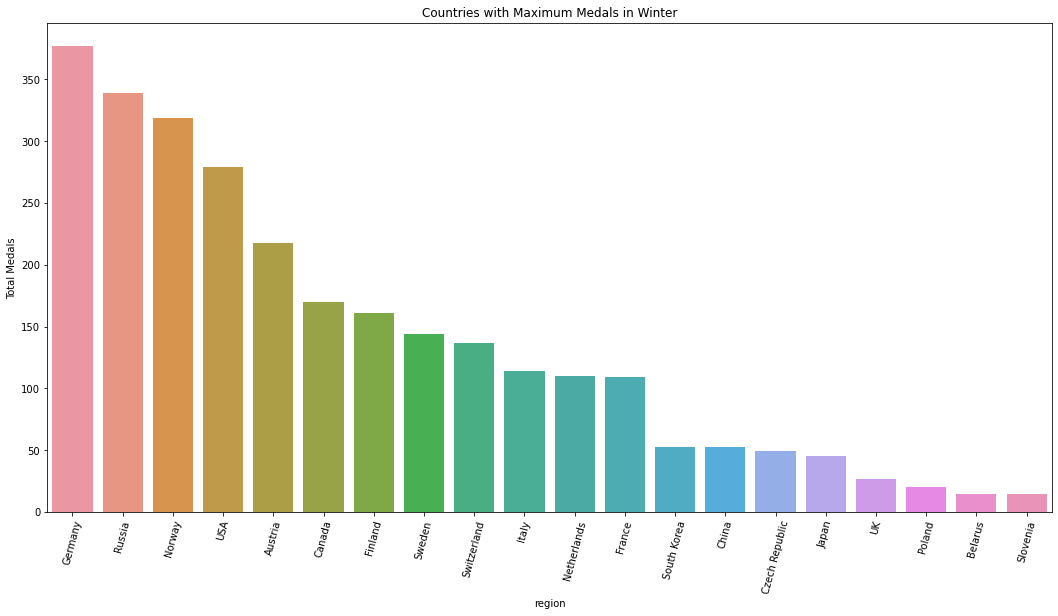

In [86]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
plt.title('Countries with Maximum Medals in Winter')
sns.barplot(x=win_medals.head(20).region, y=win_medals.head(20)["Total Medals"])
plt.show()

In [87]:
import dtale
#dtale.show(data)

In [88]:
#dtale.show(medals_country)

In [89]:
data['Team'].nunique()

1184

In [90]:
data['Team'].unique()

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

In [91]:
data.query('region=="India"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN
266934,133554,Sayed Muhammad Yusuf,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN


# SPORTS THAT HAVE FETCHED MOST NO OF GOLD AND TOTAL MEDALS

In [92]:
x=data2.drop_duplicates(subset=['Team','NOC',"Games","Year","City","Season","region","Event","Medal"])
medals_sport=x.groupby(["Sport","Season"]).sum()[["Gold","Silver","Bronze"]]
medals_sport["Total Medals"]=medals_sport.sum(axis=1)
medals_sport = medals_sport.sort_values(by="Total Medals", ascending=False).reset_index()
medals_sport

,Sport,Season,Gold,Silver,Bronze,Total Medals
0,Athletics,Summer,1000.0,1004.0,999.0,3003.0
1,Swimming,Summer,562.0,562.0,561.0,1685.0
2,Wrestling,Summer,413.0,415.0,468.0,1296.0
3,Gymnastics,Summer,337.0,318.0,319.0,974.0
4,Boxing,Summer,252.0,251.0,441.0,944.0
...,...,...,...,...,...,...
64,Ice Hockey,Summer,1.0,1.0,1.0,3.0
65,Cricket,Summer,1.0,2.0,0.0,3.0
66,Alpinism,Summer,2.0,0.0,0.0,2.0
67,Basque Pelota,Summer,1.0,0.0,0.0,1.0


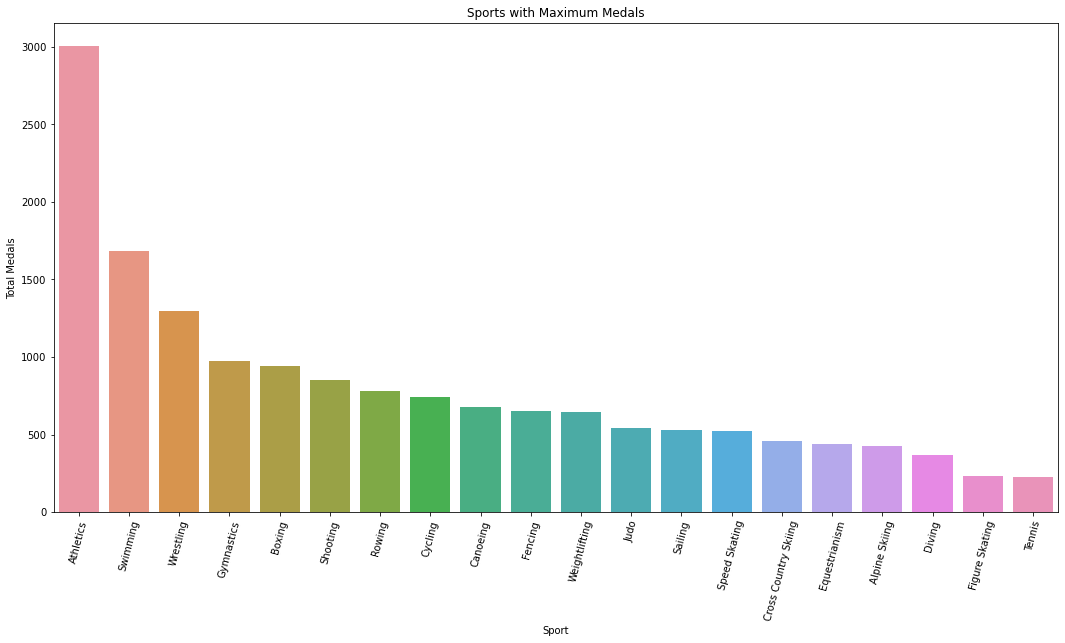

In [93]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
plt.title('Sports with Maximum Medals')
sns.barplot(x=medals_sport.head(20).Sport, y=medals_sport.head(20)["Total Medals"])
plt.show()

In [94]:
x=data2.drop_duplicates(subset=['Team','NOC',"Games","Year","City","Season","region","Event","Medal"])
gold_sport=x.groupby(["Sport","Season"]).sum()[["Gold","Silver","Bronze"]]
gold_sport = gold_sport.sort_values(by="Gold", ascending=False).reset_index()
gold_sport

,Sport,Season,Gold,Silver,Bronze
0,Athletics,Summer,1000.0,1004.0,999.0
1,Swimming,Summer,562.0,562.0,561.0
2,Wrestling,Summer,413.0,415.0,468.0
3,Gymnastics,Summer,337.0,318.0,319.0
4,Shooting,Summer,284.0,285.0,284.0
...,...,...,...,...,...
64,Military Ski Patrol,Winter,1.0,1.0,1.0
65,Ice Hockey,Summer,1.0,1.0,1.0
66,Cricket,Summer,1.0,2.0,0.0
67,Basque Pelota,Summer,1.0,0.0,0.0


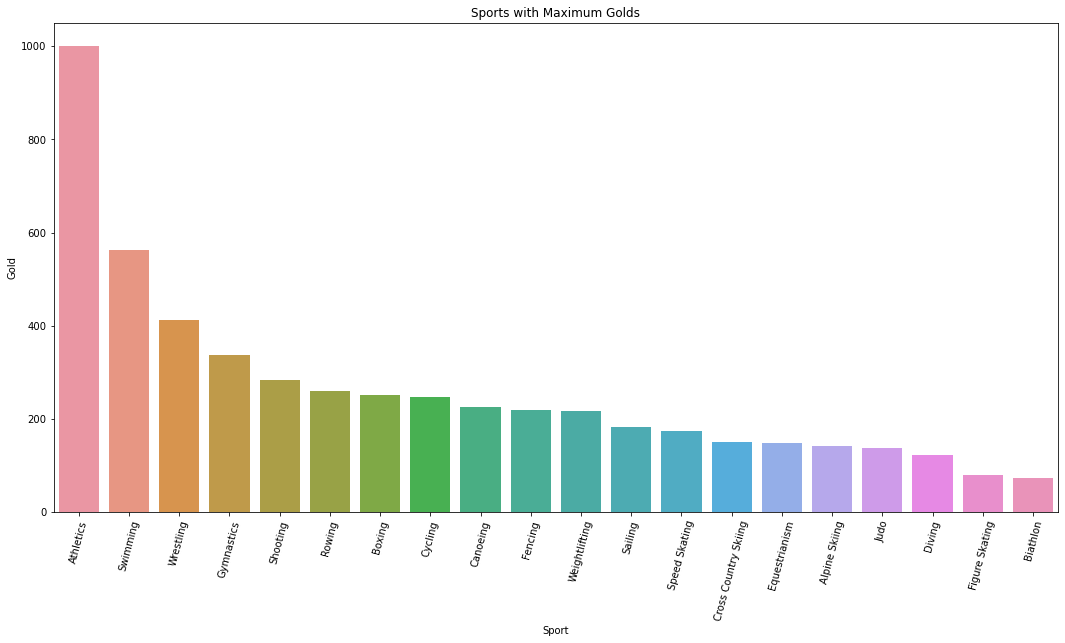

In [95]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
plt.title('Sports with Maximum Golds')
sns.barplot(x=gold_sport.head(20).Sport, y=gold_sport.head(20)["Gold"])
plt.show()

# WEIGHT DISTRIBUTION

In [96]:
data["Weight"].describe()

count    208204.000000
mean         70.701778
std          14.349027
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Count'>

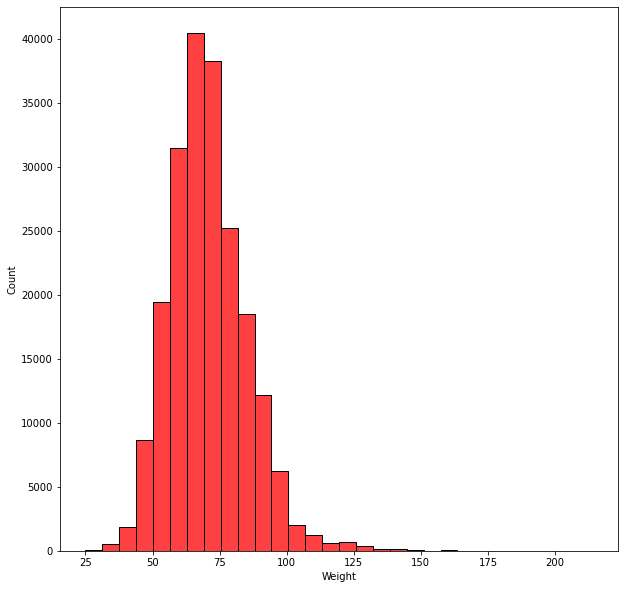

In [97]:
plt.figure(figsize = [10,10])
sns.histplot(data['Weight'],bins=30,color='red')

# HEIGHT DISTRIBUTION

In [98]:
data["Height"].describe()

count    210917.000000
mean        175.338953
std          10.518507
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

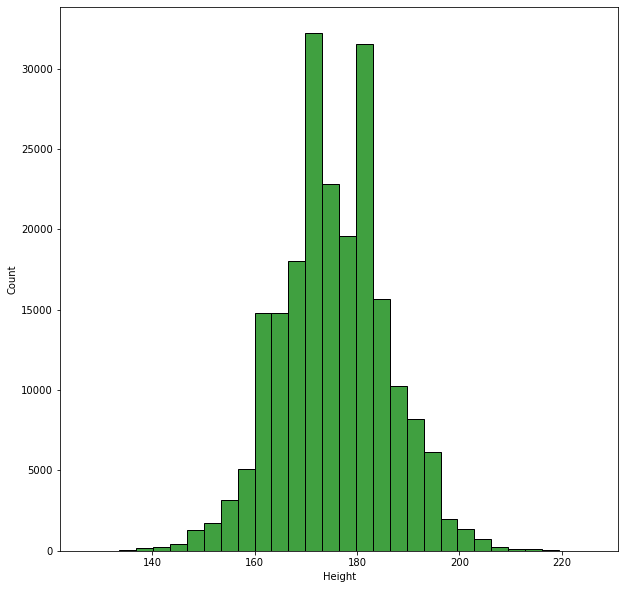

In [107]:
plt.figure(figsize = [10,10])
sns.histplot(data['Height'],bins=30,color='green')

In [100]:
# Check which sports have aged and overweight athelets have done well

C:\Users\rauna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



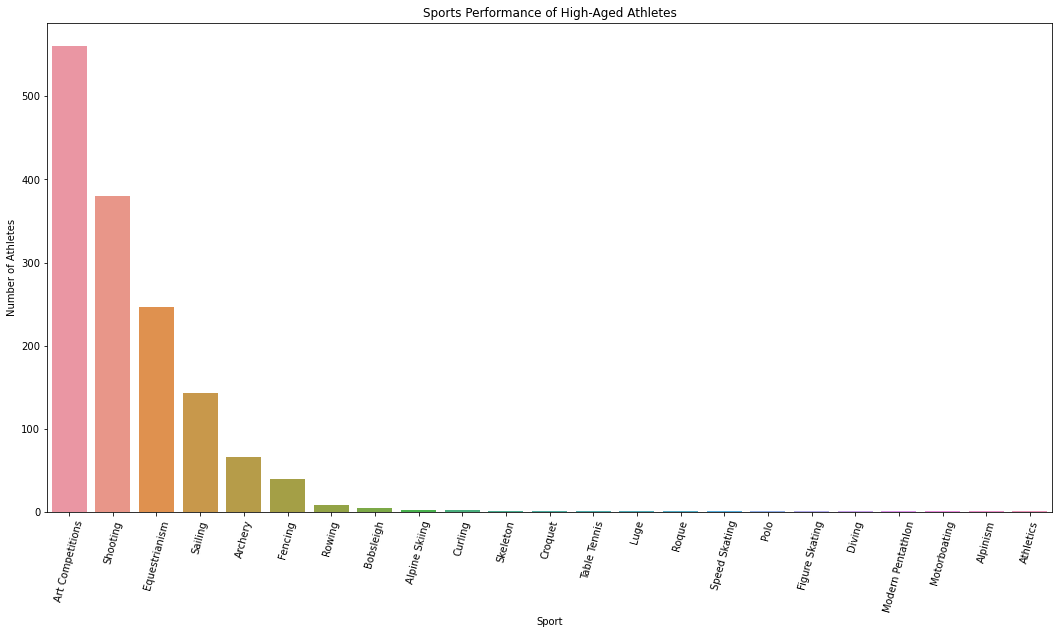

In [101]:
# Filter dataset based on age criteria
filtered_data = data[(data['Age'] > 50) & (data['Medal']!="NaN")]

sport_counts = filtered_data['Sport'].value_counts()

plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
sns.barplot(sport_counts.index, sport_counts.values)

plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Sports Performance of High-Aged Athletes')

plt.show()

C:\Users\rauna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



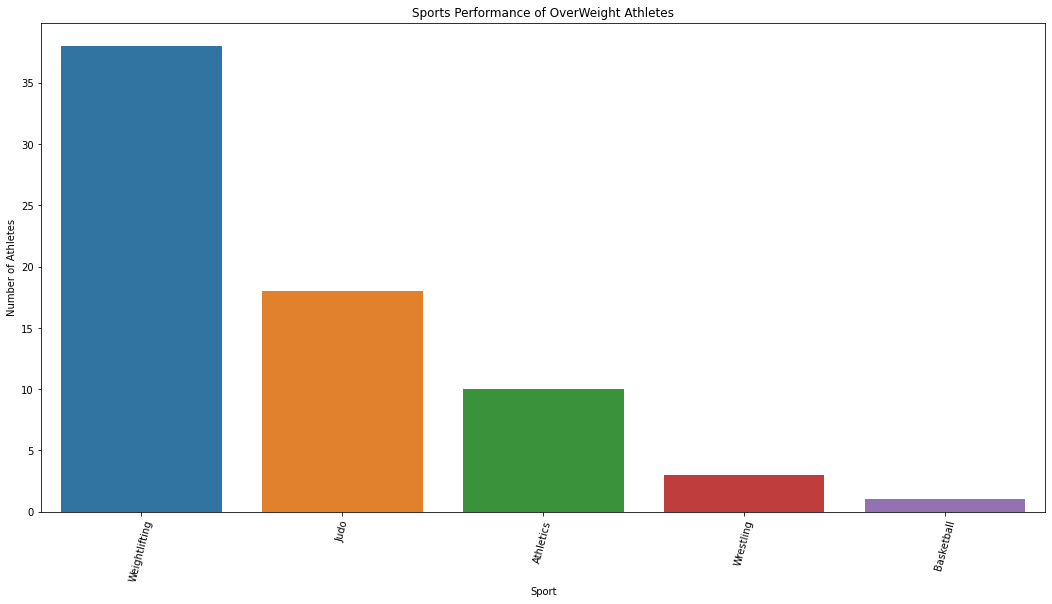

In [108]:
# Filter dataset based on weight criteria
filtered_data = data[(data['Weight'] > 150) & (data['Medal']!="NaN")]

sport_counts = filtered_data['Sport'].value_counts()

plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
sns.barplot(sport_counts.index, sport_counts.values)

plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Sports Performance of OverWeight Athletes')


# Display the plot
plt.show()